# Assignment (1)
- Saad El Dine Ahmed Saad 7370
- Morougue Mahmoud Ghazal 7524

## Part 1: K-NNClassifier

## 1. Load and Balance Data

In [1]:
import pandas as pd
from sklearn.utils import shuffle

# Load the dataset (in Pandas DataFrame)
column_names = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', 'class']
data = pd.read_csv('magic04.csv', names = column_names, index_col = False)
# Show dimensions of loaded data to make sure that data are fully loaded
print("data shape:", data.shape)
# Show First 5 Examples
data.head(5)

data shape: (19020, 11)


,0,1,2,3,4,5,6,7,8,9,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [2]:
# Separate data into gamma and hadron classes
gamma_data = data[data['class'] == 'g']
hadron_data = data[data['class'] == 'h']
# Show dimensions of gamma data
print("gamma_data shape:", gamma_data.shape)
# Show First 5 Examples of gamma_data
gamma_data.head(5)

gamma_data shape: (12332, 11)


,0,1,2,3,4,5,6,7,8,9,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
# Show dimensions of hadron data
print("hadron_data shape:", hadron_data.shape)
# Show First 5 Examples of hadron_data
hadron_data.head(5)

hadron_data shape: (6688, 11)


,0,1,2,3,4,5,6,7,8,9,class
12332,93.7035,37.9432,3.1454,0.1680,0.1011,53.2566,89.0566,11.8175,14.1224,231.9028,h
12333,102.0005,22.0017,3.3161,0.1064,0.0724,-54.0862,43.0553,-15.0647,88.4636,274.9392,h
12334,100.2775,21.8784,3.1100,0.3120,0.1446,-48.1834,57.6547,-9.6341,20.7848,346.4330,h
12335,91.6558,18.8293,2.7097,0.4386,0.3420,-52.6841,-97.8373,-17.0955,63.8834,130.7998,h
12336,38.0195,12.6736,2.8747,0.4084,0.1928,-51.4840,8.3471,7.9620,24.5402,163.8674,h


In [4]:
# Balance the dataset by randomly selecting gamma events (to prevent bias)
gamma_data = shuffle(gamma_data).iloc[:6688]
# Show dimensions of gamma data after elemination
print("gamma_data shape:", gamma_data.shape)
# Show First 5 Examples of gamma_data after elimination
gamma_data.head(5)

gamma_data shape: (6688, 11)


,0,1,2,3,4,5,6,7,8,9,class
4981,38.2736,17.2842,2.7451,0.2608,0.1466,39.1278,8.7000,14.2626,0.4229,188.455,g
8847,21.6208,16.5914,2.6698,0.4257,0.2620,27.3897,9.4802,10.3581,34.2210,230.005,g
2976,59.9630,15.0103,2.9146,0.3007,0.1686,-72.8926,47.3335,11.0761,2.5920,257.817,g
11544,36.9596,16.6503,2.7723,0.2838,0.1512,-4.0322,-28.5974,-10.5973,10.1152,250.027,g
11508,55.9692,23.7766,3.0408,0.2021,0.1033,71.9799,24.7609,13.5666,3.2503,175.683,g


In [5]:
# Combine gamma and hadron data to form the balanced dataset and Shuffle the balanced dataset to be random scattered again
final_data = shuffle(pd.concat([gamma_data, hadron_data]))
# Show dimensions of final data
print("final_data shape:", final_data.shape)
# Show First 5 Examples of final data 
final_data.head(5)

final_data shape: (13376, 11)


,0,1,2,3,4,5,6,7,8,9,class
6212,26.9109,16.0899,2.7612,0.3813,0.2071,5.0224,-16.0850,-12.1486,16.3000,229.6880,g
12886,119.9750,74.8536,3.5262,0.1906,0.1376,-47.4358,-119.0453,69.0948,86.3852,385.3241,h
2666,26.2642,19.6444,2.6395,0.3601,0.2099,7.0801,10.4091,-14.9864,26.9440,93.3478,g
9437,12.7729,11.5667,2.2978,0.7204,0.3955,-15.3926,8.3552,10.2195,35.8442,96.9367,g
13934,24.8923,17.9013,2.7702,0.3803,0.2126,39.5991,-17.8956,-13.7780,70.7260,237.9777,h


## 2. Split the data into training (70%), validation (15%), and testing (15%)

In [6]:
from sklearn.model_selection import train_test_split

# First, We Splited the data into training (70%) and the rest (30%)
train_set, cv_and_test = train_test_split(final_data, test_size = 0.3, random_state = 42)

# Then We Splited the 30% into  crossvalidation set and testing set
cv_set, test_set = train_test_split(cv_and_test, test_size = 0.5, random_state = 42)

# Display the shapes of the resulting sets
print("Training set shape:", train_set.shape)
print("Validation set shape:", cv_set.shape)
print("Testing set shape:", test_set.shape)

Training set shape: (9363, 11)
Validation set shape: (2006, 11)
Testing set shape: (2007, 11)


## 3. Apply K-NN Classifier to final_data while varying the hyperparameter K

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Initialize dictionaries to store metrics for different k values
metrics = {'k': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize K values
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 20, 30, 50, 60, 80, 100, 200, 300, 500, 650, 720, 800, 1000] 

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors = k)  

    # Train the classifier on the training data
    X_train = train_set.drop('class', axis=1) # Remove 'class' column (label)
    y_train = train_set['class']

    # Fit Model 1
    classifier.fit(X_train, y_train)

    # Make prediction on the cross validation set
    prediction = classifier.predict(cv_set.drop(columns=['class']))

    # Calculate metrics
    accuracy = accuracy_score(cv_set['class'], prediction)
    precision = precision_score(cv_set['class'], prediction, pos_label='g')
    recall = recall_score(cv_set['class'], prediction, pos_label='g')
    f1 = f1_score(cv_set['class'], prediction, pos_label='g')
    conf_matrix = confusion_matrix(cv_set['class'], prediction)

    # Store the metrics for this k = 1
    metrics['k'].append(k)
    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1_score'].append(f1)

    # Print the metrics for the current model
    print(f"Model with k = {k} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("--------------------------------------")

Model with k = 1 Metrics:
Accuracy: 0.7392821535393819
Precision: 0.7253588516746412
Recall: 0.7625754527162978
F1-Score: 0.7435017165277098
Confusion Matrix:
[[758 236]
 [287 725]]
--------------------------------------
Model with k = 3 Metrics:
Accuracy: 0.7577268195413759
Precision: 0.7351851851851852
Recall: 0.7987927565392354
F1-Score: 0.7656702025072325
Confusion Matrix:
[[794 200]
 [286 726]]
--------------------------------------
Model with k = 5 Metrics:
Accuracy: 0.7622133599202393
Precision: 0.7305976806422837
Recall: 0.823943661971831
F1-Score: 0.774468085106383
Confusion Matrix:
[[819 175]
 [302 710]]
--------------------------------------
Model with k = 7 Metrics:
Accuracy: 0.7517447657028913
Precision: 0.7164048865619547
Recall: 0.8259557344064387
F1-Score: 0.7672897196261682
Confusion Matrix:
[[821 173]
 [325 687]]
--------------------------------------
Model with k = 9 Metrics:
Accuracy: 0.752741774675972
Precision: 0.718421052631579
Recall: 0.823943661971831
F1-Score:

## 4. Compare using metrics dataframe generated

In [9]:
# Convert the metrics to a DataFrame for easy comparison
metrics_df = pd.DataFrame(metrics)
metrics_df

,k,accuracy,precision,recall,f1_score
0,1,0.739282,0.725359,0.762575,0.743502
1,3,0.757727,0.735185,0.798793,0.765670
2,5,0.762213,0.730598,0.823944,0.774468
3,7,0.751745,0.716405,0.825956,0.767290
4,9,0.752742,0.718421,0.823944,0.767573
5,11,0.756231,0.720910,0.828974,0.771175
6,13,0.756231,0.718237,0.836016,0.772664
7,15,0.757228,0.717971,0.840040,0.774223
8,20,0.746261,0.698934,0.857143,0.769995
9,30,0.747757,0.700000,0.859155,0.771454


## 5.Compare between models by plotting metrics against k values used 

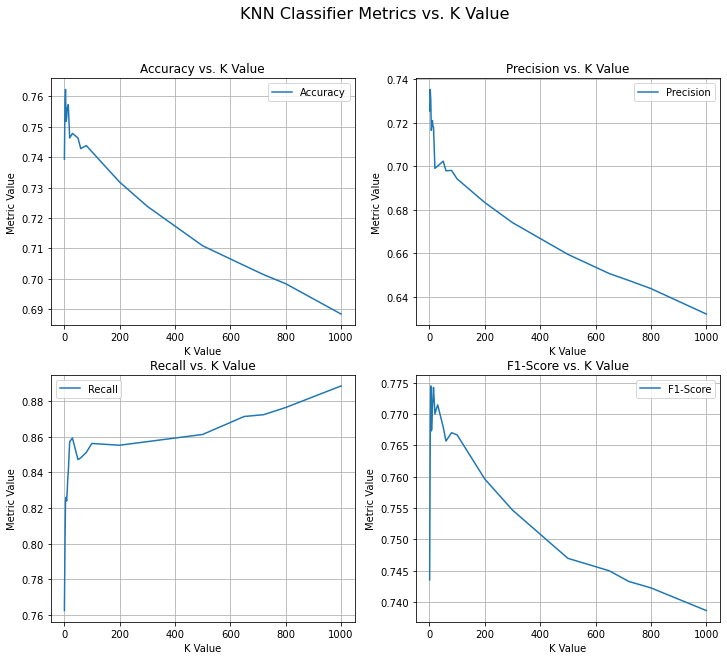

In [10]:
import matplotlib.pyplot as plt

# Create subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('KNN Classifier Metrics vs. K Value', fontsize=16)

# Plot individual metrics in subplots
axs[0, 0].plot(metrics['k'], metrics['accuracy'], label='Accuracy')
axs[0, 0].set_title('Accuracy vs. K Value')

axs[0, 1].plot(metrics['k'], metrics['precision'], label='Precision')
axs[0, 1].set_title('Precision vs. K Value')

axs[1, 0].plot(metrics['k'], metrics['recall'], label='Recall')
axs[1, 0].set_title('Recall vs. K Value')

axs[1, 1].plot(metrics['k'], metrics['f1_score'], label='F1-Score')
axs[1, 1].set_title('F1-Score vs. K Value')

for ax in axs.flat:
    ax.set(xlabel='K Value', ylabel='Metric Value')
    ax.grid()
    ax.legend()

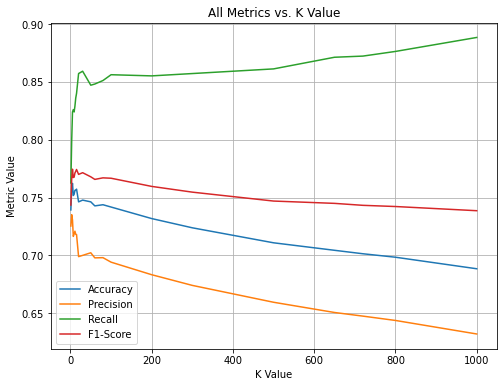

In [11]:
# plot a combined plot for all metrics
plt.figure(figsize=(8, 6))
plt.plot(metrics['k'], metrics['accuracy'], label='Accuracy')
plt.plot(metrics['k'], metrics['precision'], label='Precision')
plt.plot(metrics['k'], metrics['recall'], label='Recall')
plt.plot(metrics['k'], metrics['f1_score'], label='F1-Score')

plt.xlabel('K Value')
plt.ylabel('Metric Value')
plt.title('All Metrics vs. K Value')
plt.legend()
plt.grid()

## 6.Find best model according to accuracy 

In [12]:
# Find the model with the highest accuracy
best_model = metrics_df.loc[metrics_df['accuracy'].idxmax()]

print("Best Model with k={}:".format(best_model['k']))
print("Accuracy: {}".format(best_model['accuracy']))
print("Precision: {}".format(best_model['precision']))
print("Recall: {}".format(best_model['recall']))
print("F1 Score: {}".format(best_model['f1_score']))

Best Model with k=5.0:
Accuracy: 0.7622133599202393
Precision: 0.7305976806422837
Recall: 0.823943661971831
F1 Score: 0.774468085106383


## 7.Calculate confusion matrix of best model according to accuracy

Confusion Matrix:
[[811 157]
 [321 718]]
---------------------------------
TP (True Positives): 718
TN (True Negatives): 811
FP (False Positives): 157
FN (False Negatives): 321


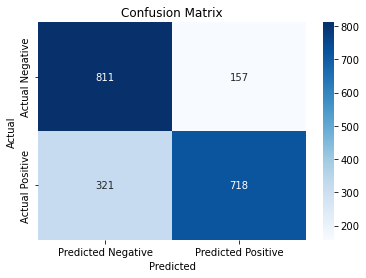

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your previous code for model training and confusion matrix calculation
best_knn = KNeighborsClassifier(n_neighbors=int(best_model['k']))
best_knn.fit(train_set.drop(columns=['class']), train_set['class'])
predictions = best_knn.predict(test_set.drop(columns=['class']))
conf_matrix = confusion_matrix(test_set['class'], predictions)

# Extract the values from the confusion matrix
true_positive = conf_matrix[1][1]
true_negative = conf_matrix[0][0]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]

print("Confusion Matrix:")
print(conf_matrix)
print("---------------------------------")
# Print the confusion matrix with labels
print(f'TP (True Positives): {true_positive}')
print(f'TN (True Negatives): {true_negative}')
print(f'FP (False Positives): {false_positive}')
print(f'FN (False Negatives): {false_negative}')

# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

## 8.Find best model according to F1 Score

In [14]:
# Find the model with the highest f1 score
best_model = metrics_df.loc[metrics_df['f1_score'].idxmax()]

print("Best Model with k={}:".format(best_model['k']))
print("Accuracy: {}".format(best_model['accuracy']))
print("Precision: {}".format(best_model['precision']))
print("Recall: {}".format(best_model['recall']))
print("F1 Score: {}".format(best_model['f1_score']))

Best Model with k=5.0:
Accuracy: 0.7622133599202393
Precision: 0.7305976806422837
Recall: 0.823943661971831
F1 Score: 0.774468085106383


## Calculate confusion matrix of best model according to f1 score

Confusion Matrix:
[[811 157]
 [321 718]]
---------------------------------
TP (True Positives): 718
TN (True Negatives): 811
FP (False Positives): 157
FN (False Negatives): 321


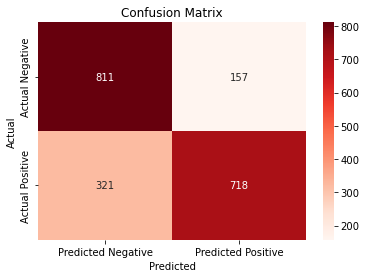

In [18]:
# Calculate the confusion matrix for the best model
best_knn = KNeighborsClassifier(n_neighbors=int(best_model['k']))
best_knn.fit(train_set.drop(columns=['class']), train_set['class'])
predictions = best_knn.predict(test_set.drop(columns=['class']))
conf_matrix = confusion_matrix(test_set['class'], predictions)

# Extract the values from the confusion matrix
true_positive = conf_matrix[1][1]
true_negative = conf_matrix[0][0]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]

print("Confusion Matrix:")
print(conf_matrix)
print("---------------------------------")
# Print the confusion matrix with labels
print(f'TP (True Positives): {true_positive}')
print(f'TN (True Negatives): {true_negative}')
print(f'FP (False Positives): {false_positive}')
print(f'FN (False Negatives): {false_negative}')

# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()